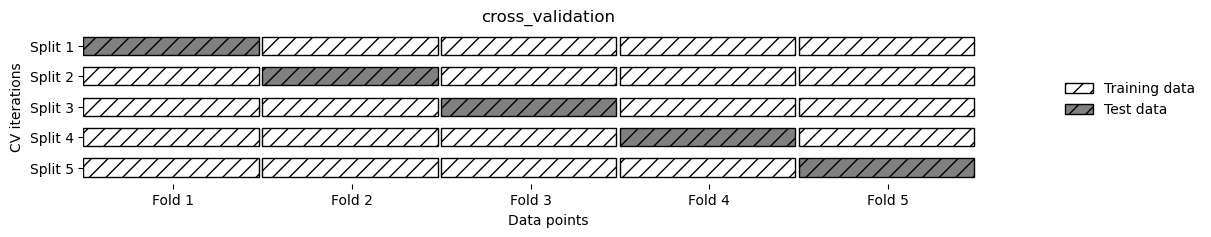

In [1]:
import mglearn
mglearn.plots.plot_cross_validation()

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris=load_iris()
logreg=LogisticRegression(max_iter=1000)
scores=cross_val_score(logreg,iris.data,iris.target)
print("Cross-validation scores:{}".format(scores))

Cross-validation scores:[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [3]:
scores=cross_val_score(logreg,iris.data,iris.target,cv=5)
print("Cross-validation score:{}".format(scores))

Cross-validation score:[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [4]:
print("Average cross-validation score:{:.2f}".format(scores.mean()))

Average cross-validation score:0.97


In [5]:
from sklearn.datasets import load_iris
iris=load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


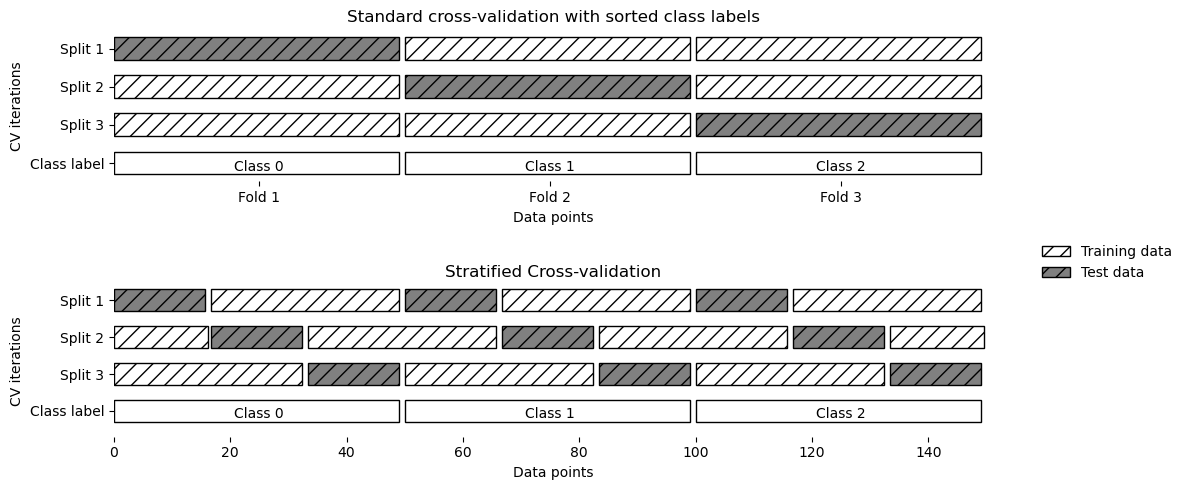

In [6]:
mglearn.plots.plot_stratified_cross_validation()

In [7]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5)

In [8]:
print("Cross-validation scores:\n{}".format(cross_val_score(logreg,iris.data,iris.target,cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [9]:
kfold=KFold(n_splits=3)
print("Cross-validation score:\n{}".format(cross_val_score(logreg,iris.data,iris.target,cv=kfold)))

Cross-validation score:
[0. 0. 0.]


In [10]:
kfold=KFold(n_splits=3,shuffle=True,random_state=0)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg,iris.data,iris.target,cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


In [11]:
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()
scores=cross_val_score(logreg,iris.data,iris.target,cv=loo)
print("Number of cv iterations:",len(scores))
print("Mean accuracy:{:.2f}".format(scores.mean()))

Number of cv iterations: 150
Mean accuracy:0.97


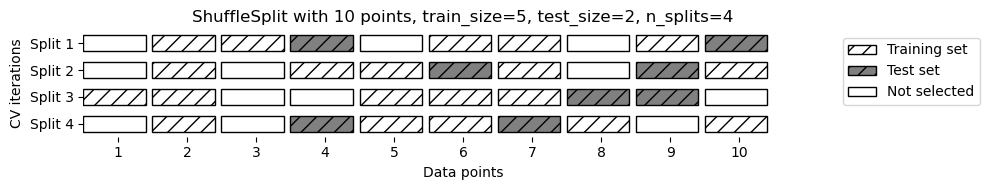

In [12]:
mglearn.plots.plot_shuffle_split()

In [13]:
from sklearn.model_selection import ShuffleSplit
import numpy as np
shuffle_split=ShuffleSplit(test_size=.5,train_size=.5,n_splits=10)
scores=cross_val_score(logreg,iris.data,iris.target,cv=shuffle_split)
print("Cross-validation scores:{}".format(scores))

Cross-validation scores:[0.97333333 0.96       0.98666667 0.97333333 0.97333333 0.96
 0.94666667 0.96       0.94666667 0.93333333]


In [14]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=12,random_state=0)
groups=[0,0,0,1,1,1,1,2,2,3,3,3]
scores=cross_val_score(logreg,X,y,groups=groups,cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


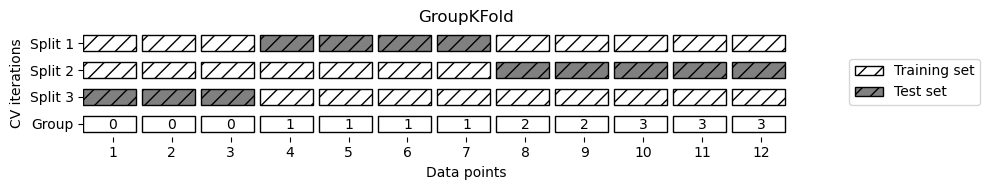

In [15]:
mglearn.plots.plot_group_kfold()

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=0)
print("Size of training set:{}\nsize of test set:{}".format(X_train.shape[0],X_test.shape[0]))
best_score=0
for gamma in[0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score=svm.score(X_test,y_test)
        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}
print("Best score:{:.2f}".format(best_score))
print("Best parameters:{:.2f}",best_parameters)

Size of training set:112
size of test set:38
Best score:0.97
Best parameters:{:.2f} {'C': 100, 'gamma': 0.001}


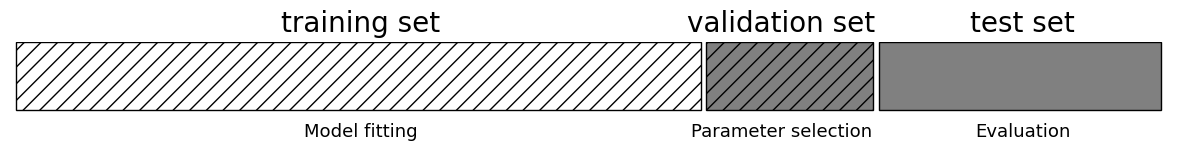

In [17]:
mglearn.plots.plot_threefold_split()

In [18]:
from sklearn.svm import SVC
X_trainval,X_test,y_trainval,y_test=train_test_split(iris.data,iris.target,random_state=0)
X_train,X_valid,y_train,y_valid=train_test_split(X_trainval,y_trainval,random_state=0)
print("Size of training set:{}   size of validation set:{}   size of test set:""{}\n".format(X_train.shape[0],X_valid.shape[0],X_test.shape[0]))
best_score=0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score=svm.score(X_valid,y_valid)
        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}
svm=SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
test_score=svm.score(X_test,y_test)
print("Best score on validation set:{:.2f}".format(best_score))
print("Best parameters:",best_parameters)
print("Test set score with best parameters:{:.2f}".format(test_score))

Size of training set:84   size of validation set:28   size of test set:38

Best score on validation set:1.00
Best parameters: {'C': 100, 'gamma': 0.001}
Test set score with best parameters:0.97


In [19]:
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=C)
        scores=cross_val_score(svm,X_trainval,y_trainval,cv=5)
        score=np.mean(scores)
        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}
svm=SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)

SVC(C=100, gamma=0.001)

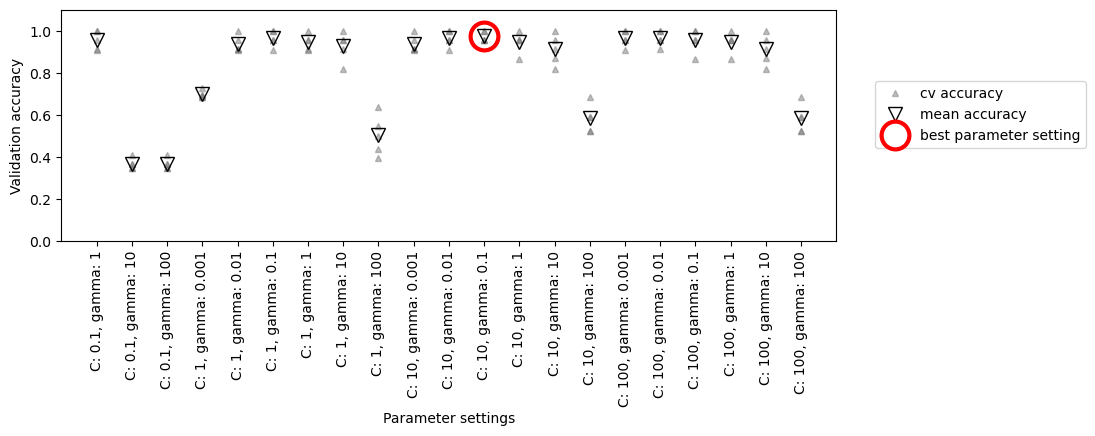

In [20]:
mglearn.plots.plot_cross_val_selection()

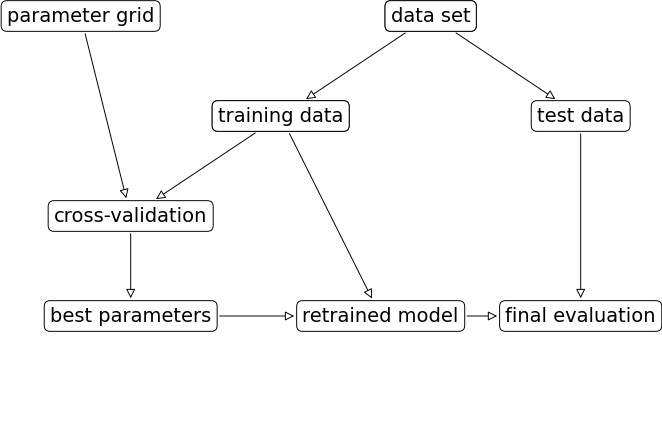

In [21]:
mglearn.plots.plot_grid_search_overview()

In [22]:
param_grid={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}
print("Parameter grid:{}\n".format(param_grid))

Parameter grid:{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}



In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search=GridSearchCV(SVC(),param_grid,cv=5)
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=0)

In [24]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [25]:
print("Best parameters:{}".format(grid_search.best_params_))
print("Best cross-validation score:{:.2f}".format(grid_search.best_score_))

Best parameters:{'C': 10, 'gamma': 0.1}
Best cross-validation score:0.97


In [26]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


In [27]:
import pandas as pd
results=pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005509,0.000722,0.002032,0.000756,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.005380,0.000566,0.001887,0.000450,0.001,0.010,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.004885,0.000566,0.001827,0.000414,0.001,0.100,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.004710,0.000432,0.001507,0.000538,0.001,1.000,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.004676,0.000686,0.002165,0.000572,0.001,10.000,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


TypeError: Only length-1 arrays can be converted to Python scalars

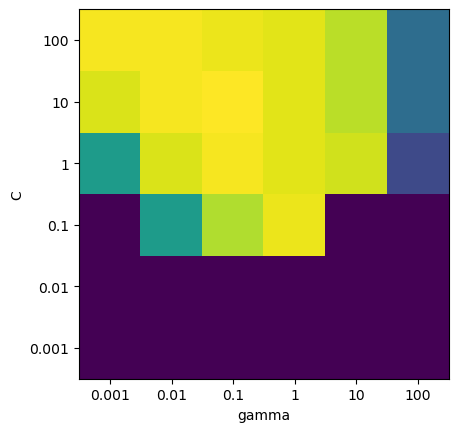

In [28]:
scores=np.array(results.mean_test_score).reshape(6,6)
mglearn.tools.heatmap(scores,xlabel='gamma',xticklabels=param_grid['gamma'],ylabel='C',yticklabels=param_grid['C'],cmap="viridis")

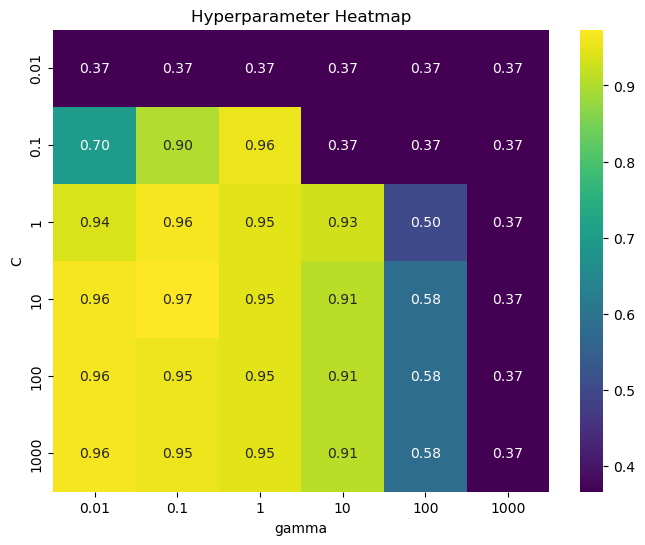

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# 加载数据集
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 定义参数网格
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.01, 0.1, 1, 10, 100, 1000]
}

# 使用 GridSearchCV 搜索最佳参数
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

# 提取交叉验证得分并调整形状
scores = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

# 绘制热图
plt.figure(figsize=(8, 6))
sns.heatmap(
    scores, 
    annot=True,  # 显示数值
    fmt=".2f",   # 数值格式
    xticklabels=param_grid['gamma'],
    yticklabels=param_grid['C'],
    cmap="viridis"
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.title("Hyperparameter Heatmap")
plt.show()


In [30]:
param_grid=[{'kernel':['rbf'],'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]},{'kernel':['linear'],'C':[0.001,0.01,0.1,1,10,100]}]
print("list of grids:\n{}".format(param_grid))

list of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [31]:
grid_search=GridSearchCV(SVC(),param_grid,cv=5)
grid_search.fit(X_train,y_train)
print("Best parameters:{}".format(grid_search.best_params_))
print("Best cross-validation score:{:.3f}".format(grid_search.best_score_))

Best parameters:{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score:0.973


In [32]:
results=pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.004743,0.004989,0.004597,0.004894,0.004376,0.004795,0.004905,0.004987,0.004583,0.00447,...,0.001597,0.002598,0.004901,0.005582,0.004693,0.003348,0.002393,0.001793,0.001804,0.001793
std_fit_time,0.001143,0.00063,0.000481,0.000513,0.000809,0.000719,0.000648,0.000626,0.000494,0.000736,...,0.000487,0.000774,0.000511,0.001203,0.000557,0.000455,0.000489,0.000748,0.000397,0.000395
mean_score_time,0.001995,0.00199,0.002181,0.002043,0.001815,0.001591,0.002013,0.001393,0.001391,0.001841,...,0.0008,0.001006,0.00183,0.002188,0.001444,0.001593,0.001199,0.000995,0.000595,0.0006
std_score_time,0.000023,0.000009,0.000391,0.000603,0.000403,0.000479,0.000627,0.00049,0.00049,0.000428,...,0.0004,0.000016,0.000417,0.000743,0.000516,0.000488,0.000398,0.000001,0.000486,0.00049
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100.0,100.0,100.0,100.0,0.001,0.01,0.1,1.0,10.0,100.0
param_gamma,0.001,0.01,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,...,0.1,1.0,10.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


In [33]:
scores=cross_val_score(GridSearchCV(SVC(),param_grid,cv=5),iris.data,iris.target,cv=5)
print("Cross-validation scores:",scores)
print("Mean cross-validation score:",scores.mean())

Cross-validation scores: [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score: 0.9666666666666668


In [34]:
def nested_cv(X,y,inner_cv,outer_cv,Classifier,parameter_grid):
    outer_scores=[]
    for training_samples,test_samples in outer_cv.split(X,y):
        best_parms={}
        best_score=-np.inf
        for parameters in parameter_grid:
            cv_scores=[]
            for inner_train,inner_test in inner_cv.split(X[training_samples],y[training_samples]):
                clf=Classifier(**parameters)
                clf.fit(X[inner_train],y[inner_train])
                score=clf.score(X[inner_test],y[inner_test])
                cv_scores.append(score)
            mean_score=np.mean(cv_scores)
            if mean_score>best_score:
                best_score=mean_score
                best_params=parameters
            clf=Classifier(**best_params)
            clf.fit(X[training_samples],y[training_samples])
            outer_scores.append(clf.score(X[test_samples],y[test_samples]))
    return np.array(outer_scores)

In [35]:
from sklearn.model_selection import ParameterGrid,StratifiedKFold
scores=nested_cv(iris.data,iris.target,StratifiedKFold(5),StratifiedKFold(5),SVC,ParameterGrid(param_grid))
print("Cross-validation scores:{}".format(scores))

Cross-validation scores:[0.86666667 0.86666667 0.86666667 0.86666667 0.86666667 0.86666667
 0.86666667 0.86666667 0.86666667 0.86666667 0.86666667 0.86666667
 0.86666667 0.86666667 0.9        0.9        0.9        0.9
 0.9        0.9        0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333 0.83333333
 0.8333333

In [36]:
from sklearn.datasets import load_digits
digits=load_digits()
y=digits.target==9
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=0)

In [37]:
from sklearn.dummy import DummyClassifier
dummy_majority=DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
pred_most_frequent=dummy_majority.predict(X_test)
print("Unique predicted labels:{}".format(np.unique(pred_most_frequent)))
print("Test score:{:.2f}".format(dummy_majority.score(X_test,y_test)))

Unique predicted labels:[False]
Test score:0.90


In [38]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
pred_tree=tree.predict(X_test)
print("Test score:{:.2f}".format(tree.score(X_test,y_test)))

Test score:0.92


In [39]:
from sklearn.linear_model import LogisticRegression
dummy=DummyClassifier().fit(X_train,y_train)
pred_dummy=dummy.predict(X_test)
print("dummy score:{:.3f}".format(dummy.score(X_test,y_test)))
logreg=LogisticRegression(C=0.1,max_iter=1000).fit(X_train,y_train)
pred_logreg=logreg.predict(X_test)
print("logreg score:{:.2f}".format(logreg.score(X_test,y_test)))

dummy score:0.896
logreg score:0.98


In [40]:
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,pred_logreg)
print("Confusion matrix;\n{}".format(confusion))

Confusion matrix;
[[402   1]
 [  6  41]]


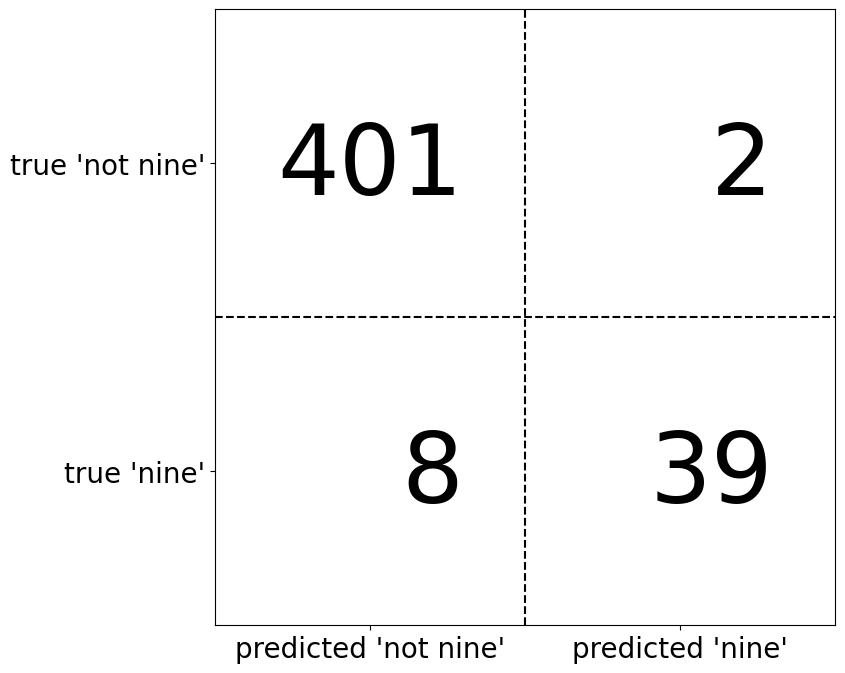

In [41]:
mglearn.plots.plot_confusion_matrix_illustration()

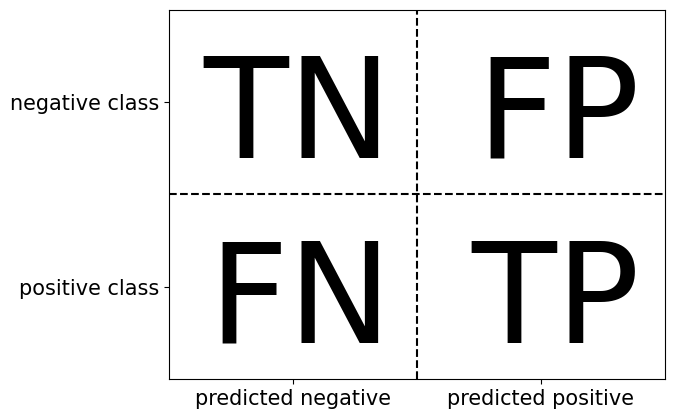

In [42]:
mglearn.plots.plot_binary_confusion_matrix()

In [43]:
print("Most frequent class:")
print(confusion_matrix(y_test,pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test,pred_dummy))
print("\nDecision tree")
print(confusion_matrix(y_test,pred_tree))
print("\nLogisti Regression:")
print(confusion_matrix(y_test,pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Decision tree
[[390  13]
 [ 24  23]]

Logisti Regression:
[[402   1]
 [  6  41]]


In [44]:
from sklearn.metrics import f1_score
print("f1 score most frequent:{:.2f}".format(f1_score(y_test,pred_most_frequent)))
print("f1 score dummy:{:.2f}".format(f1_score(y_test,pred_dummy)))
print("f1 score tree:{:.2f}".format(f1_score(y_test,pred_tree)))
print("f1 score logistic regression:{:.2f}".format(f1_score(y_test,pred_logreg)))

f1 score most frequent:0.00
f1 score dummy:0.00
f1 score tree:0.55
f1 score logistic regression:0.92


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_most_frequent,target_names=["not nine","nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
print(classification_report(y_test,pred_logreg,target_names=["not nine","nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [47]:
from mglearn.datasets import make_blobs
X,y=make_blobs(n_samples=450,centers=2,cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
svc=SVC(gamma=.05).fit(X_train,y_train)

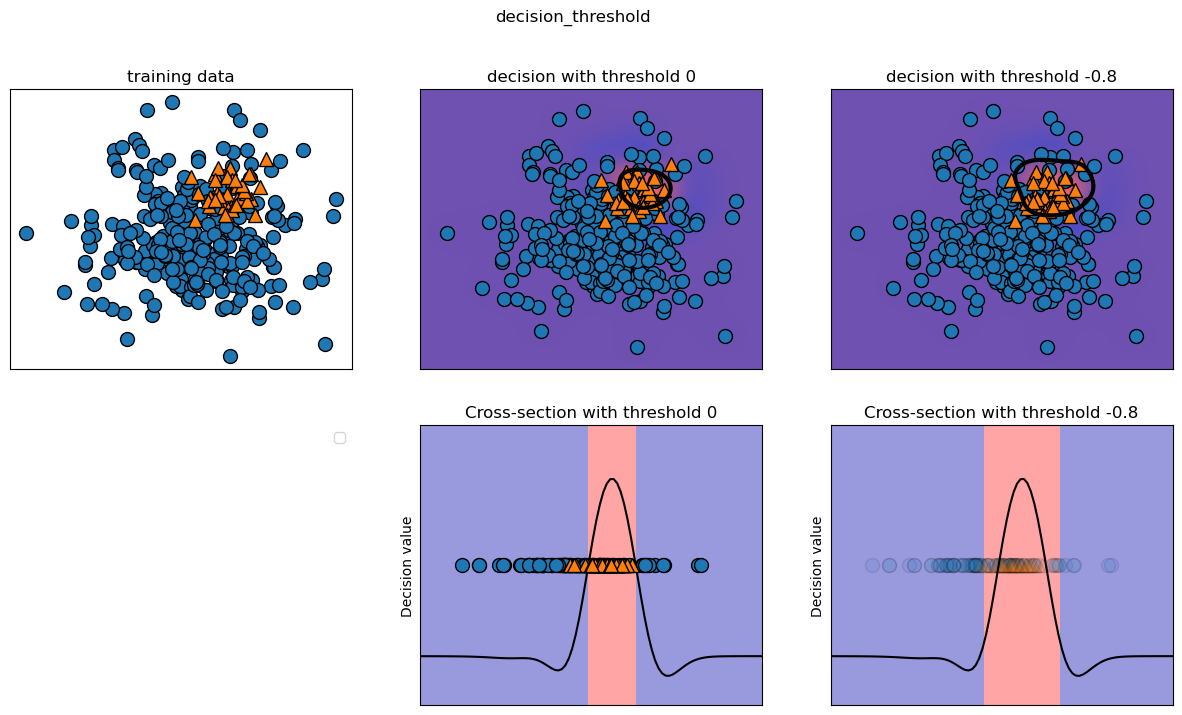

In [48]:
mglearn.plots.plot_decision_threshold()

In [49]:
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87        60
           1       0.81      0.96      0.88        53

    accuracy                           0.88       113
   macro avg       0.88      0.88      0.88       113
weighted avg       0.89      0.88      0.88       113



In [50]:
y_pred_lower_threshold=svc.decision_function(X_test)>-.8
print(classification_report(y_test,y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        60
           1       0.78      1.00      0.88        53

    accuracy                           0.87       113
   macro avg       0.89      0.88      0.87       113
weighted avg       0.90      0.87      0.87       113



In [51]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_test,svc.decision_function(X_test))

Text(0, 0.5, 'Recall')

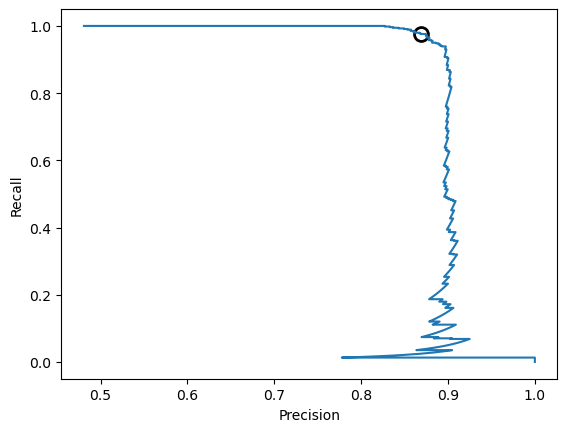

In [52]:
X,y=make_blobs(n_samples=4500,centers=2,cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
svc=SVC(gamma=.05).fit(X_train,y_train)
precision,recall,thresholds=precision_recall_curve(y_test,svc.decision_function(X_test))
close_zero=np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label="threshold zero",fillstyle="none",c='k',mew=2)
plt.plot(precision,recall,label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

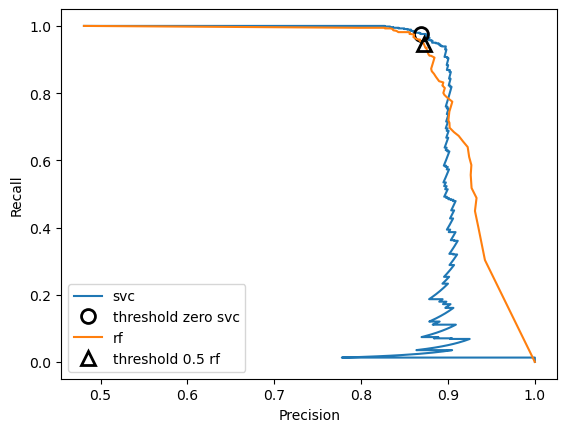

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=0,max_features=2)
rf.fit(X_train,y_train)
precision_rf,recall_rf,thresholds_rf=precision_recall_curve(y_test,rf.predict_proba(X_test)[:,1])
plt.plot(precision,recall,label="svc")
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label="threshold zero svc",fillstyle="none",c="k",mew=2)
plt.plot(precision_rf,recall_rf,label="rf")
close_default_rf=np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf],recall_rf[close_default_rf],'^',markersize=10,label="threshold 0.5 rf",fillstyle="none",c="k",mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [54]:
print("f1_score of random forest:{:.3f}".format(f1_score(y_test,rf.predict(X_test))))
print("f1_score of svc:{:.3f}".format(f1_score(y_test,svc.predict(X_test))))

f1_score of random forest:0.906
f1_score of svc:0.919


In [55]:
from sklearn.metrics import average_precision_score
ap_rf=average_precision_score(y_test,rf.predict_proba(X_test)[:,1])
ap_svc=average_precision_score(y_test,svc.decision_function(X_test))
print("Average precision of random forest:{:.3f}".format(ap_rf))
print("Average precision of random forest:{:.3f}".format(ap_svc))

Average precision of random forest:0.917
Average precision of random forest:0.898


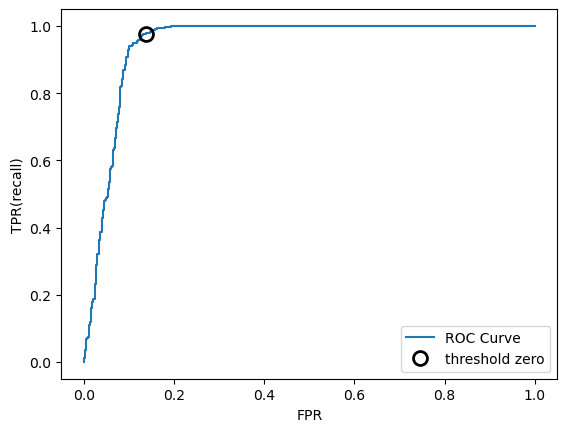

In [56]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,svc.decision_function(X_test))
plt.plot(fpr,tpr,label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
close_zero=np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,label="threshold zero",fillstyle="none",c='k',mew=2)
plt.legend(loc=4)

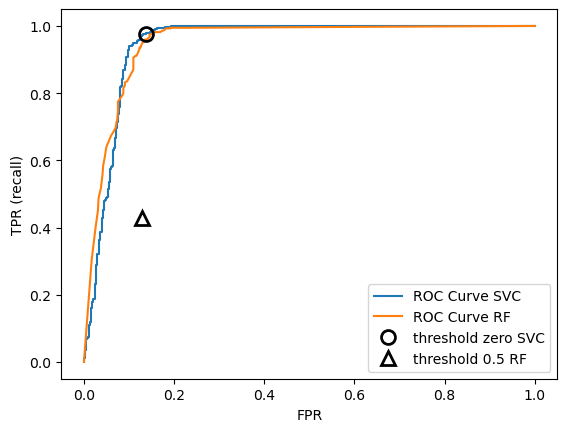

In [57]:
from sklearn.metrics import roc_curve
fpr_rf,tpr_rf,thresholds_rf=roc_curve(y_test,rf.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label="ROC Curve SVC")
plt.plot(fpr_rf,tpr_rf,label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize=10,label="threshold zero SVC",fillstyle="none",c='k',mew=2)
close_default_rf=np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf],tpr[close_default_rf],'^',markersize=10,label="threshold 0.5 RF",fillstyle="none",c='k',mew=2)
plt.legend(loc=4)

In [58]:
from sklearn.metrics import roc_auc_score
rf_auc=roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
svc_auc=roc_auc_score(y_test,svc.decision_function(X_test))
print("AUC for Random Forest:{:.3f}".format(rf_auc))
print("AUC for SVC:{:.3f}".format(svc_auc))

AUC for Random Forest:0.949
AUC for SVC:0.946


gamma=1.00  accuracy=0.90 AUC=0.50
gamma=0.05  accuracy=0.90 AUC=1.00
gamma=0.01  accuracy=0.90 AUC=1.00


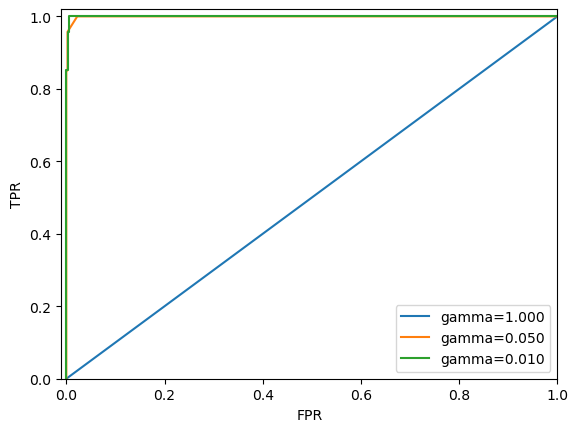

In [59]:
y=digits.target==9
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=0)
plt.figure()
for gamma in [1,0.05,0.01]:
    svc=SVC(gamma=gamma).fit(X_train,y_train)
    accuracy=svc.score(X_test,y_test)
    auc=roc_auc_score(y_test,svc.decision_function(X_test))
    fpr,tpr,_=roc_curve(y_test,svc.decision_function(X_test))
    print("gamma={:.2f}  accuracy={:.2f} AUC={:.2f}".format(gamma,accuracy,auc))
    plt.plot(fpr,tpr,label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01,1)
plt.ylim(0,1.02)
plt.legend(loc="best")

In [60]:
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,random_state=0)
lr=LogisticRegression(max_iter=1000).fit(X_train,y_train)
pred=lr.predict(X_test)
print("Accuracy :{:.3f}".format(accuracy_score(y_test,pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test,pred)))

Accuracy :0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


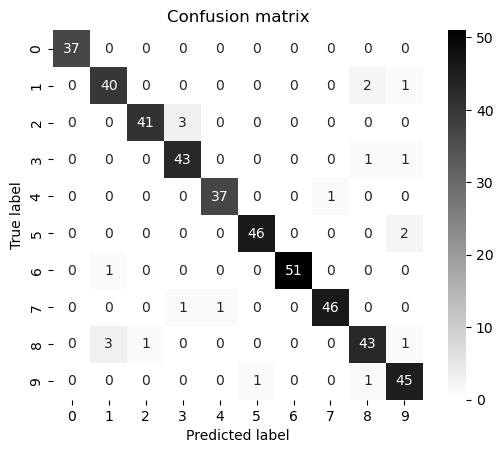

In [61]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import mglearn
import seaborn as sns
conf_matrix = confusion_matrix(y_test, pred)
if isinstance(conf_matrix, np.ma.MaskedArray):
    conf_matrix = conf_matrix.data
conf_matrix = np.asarray(conf_matrix, dtype=int)
try:
    scores_image = mglearn.tools.heatmap(
        conf_matrix,
        xlabel='Predicted label',
        ylabel='True label',
        xticklabels=digits.target_names,
        yticklabels=digits.target_names,
        cmap=plt.cm.gray_r,
        fmt="%d"
    )
    plt.title("Confusion matrix")
    plt.gca().invert_yaxis()
    plt.show()
except TypeError:
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="gray_r", xticklabels=digits.target_names, yticklabels=digits.target_names)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion matrix')
    plt.show()


In [62]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [63]:
print("Micro average f1 score :{:.3f}".format(f1_score(y_test,pred,average="micro")))
print("Macro average f1 score :{:.3f}".format(f1_score(y_test,pred,average="macro")))

Micro average f1 score :0.953
Macro average f1 score :0.954


In [64]:
print("Default scoring:{}".format(cross_val_score(SVC(),digits.data,digits.target==9)))
explicit_accuracy=cross_val_score(SVC(),digits.data,digits.target==9,scoring="accuracy")
print("Explicit accuracy scoring:{}".format(explicit_accuracy))
roc_auc=cross_val_score(SVC(),digits.data,digits.target==9,scoring="roc_auc")
print("AUC scoring:{}".format(roc_auc))

Default scoring:[0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy scoring:[0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring:[0.99717078 0.99854252 1.         0.999828   0.98400413]


In [65]:
X_trian,X_test,y_train,y_test=train_test_split(digits.data,digits.target==9,random_state=0)
param_grid={'gamma':[0.0001,0.01,0.1,1,10]}
grid=GridSearchCV(SVC(),param_grid=param_grid)
grid.fit(X_train,y_train)
print("Grid-Search with accuracy")
print("Best parameters:",grid.best_params_)
print("Best cross-validation score(accuracy)):{:.3f}".format(grid.best_score_))
print("Test set AUC:{:.3f}".format(roc_auc_score(y_test,grid.decision_function(X_test))))
print("Test set accuracy:{:.3f}".format(grid.score(X_test,y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score(accuracy)):0.976
Test set AUC:0.992
Test set accuracy:0.973


In [68]:
grid=GridSearchCV(SVC(),param_grid=param_grid,scoring="roc_auc")
grid.fit(X_train,y_train)
print("\nGrid-Search with AUC")
print("Best parameters:",grid.best_params_)
print("Best cross-validation score (AUC):{:.3f}".format(grid.best_score_))
print("Test set AUC:{:.3f}".format(roc_auc_score(y_test,grid.decision_function(X_test))))
print("Test set accuracy:{:.3f}".format(grid.score(X_test,y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC):0.998
Test set AUC:1.000
Test set accuracy:1.000


In [74]:
from sklearn.metrics import get_scorer_names
print("Available scorers:\n{}".format(sorted(get_scorer_names())))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', '